# Comparing 2017 and 2021

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [19]:
b_2021 = pd.read_csv("data/2021_beta_results.csv")
b_2017 = pd.read_csv("data/betas_2017.csv")
g_2017 = pd.read_csv("data/gammas_2017.csv")
g_2021 = pd.read_csv("data/2021_gamma_results.csv")

In [20]:
common_elements = set(b_2017["j"]).intersection(set(b_2021["j"]))
print(common_elements)

{'Sugar, white, granulated or lump', 'Carrots, raw', 'Cheese, cheddar', 'Pancake syrup', 'Butter, stick', 'Apple, raw', 'Cheese, nfs', 'Pork bacon, ns as to fresh, smoked or cured, cooked', 'Grapes, raw', 'Soft drink, fruit flavored, caffeine free', 'Potato, french fries, fast food', 'Milk, reduced fat (2%)', 'Cucumber, raw', 'Soft drink, cola', 'Onions, raw', 'Egg, whole, boiled or poached', 'Milk, low fat (1%)', 'Ketchup', 'Strawberries, raw', 'Lettuce, raw', 'Water, tap', 'Lettuce, for use on a sandwich', 'Mayonnaise, regular', 'Orange, raw', 'Tomatoes, raw', 'Italian dressing, made with vinegar and oil', 'Coffee creamer, liquid, flavored', 'Coffee, brewed', 'Cookie, chocolate chip', 'Milk, whole', 'Orange juice, 100%, canned, bottled or in a carton', 'Peanut butter', 'Tomatoes, for use on a sandwich', 'Mustard', 'Banana, raw', 'Hot pepper sauce'}


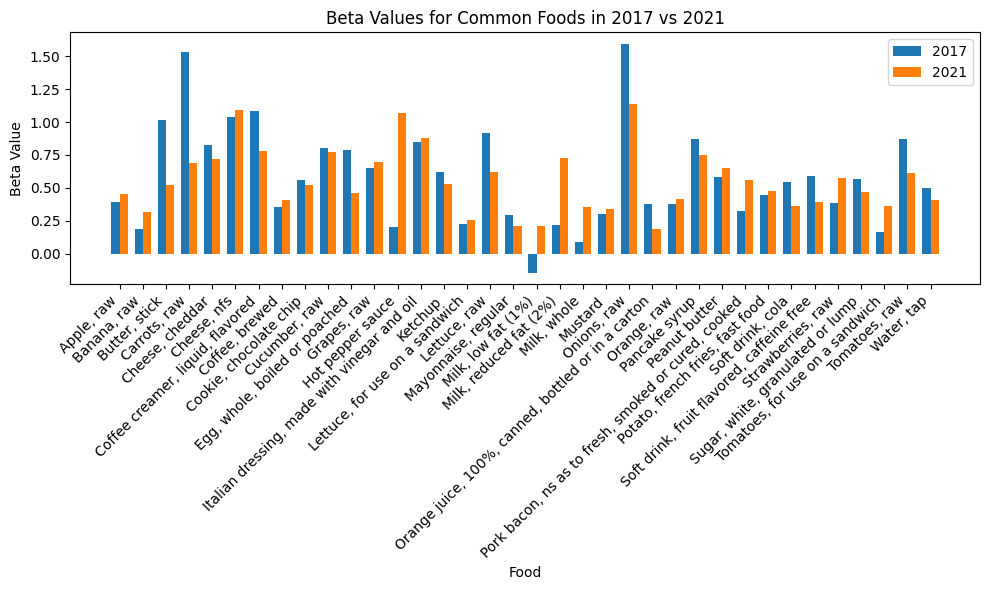

In [21]:
df_2017_common = b_2017[b_2017['j'].isin(common_elements)]
df_2021_common = b_2021[b_2021['j'].isin(common_elements)]

# Merge the two dataframes on the common "j" column.
merged = pd.merge(df_2017_common, df_2021_common, on='j', suffixes=('_2017', '_2021'))

# Create a bar chart that shows side-by-side beta values for each common element.
x = np.arange(len(merged))  # the label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, merged['beta_2017'], width, label='2017')
rects2 = ax.bar(x + width/2, merged['beta_2021'], width, label='2021')

# Add labels and title
ax.set_xlabel('Food')
ax.set_ylabel('Beta Value')
ax.set_title('Beta Values for Common Foods in 2017 vs 2021')
ax.set_xticks(x)
ax.set_xticklabels(merged['j'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


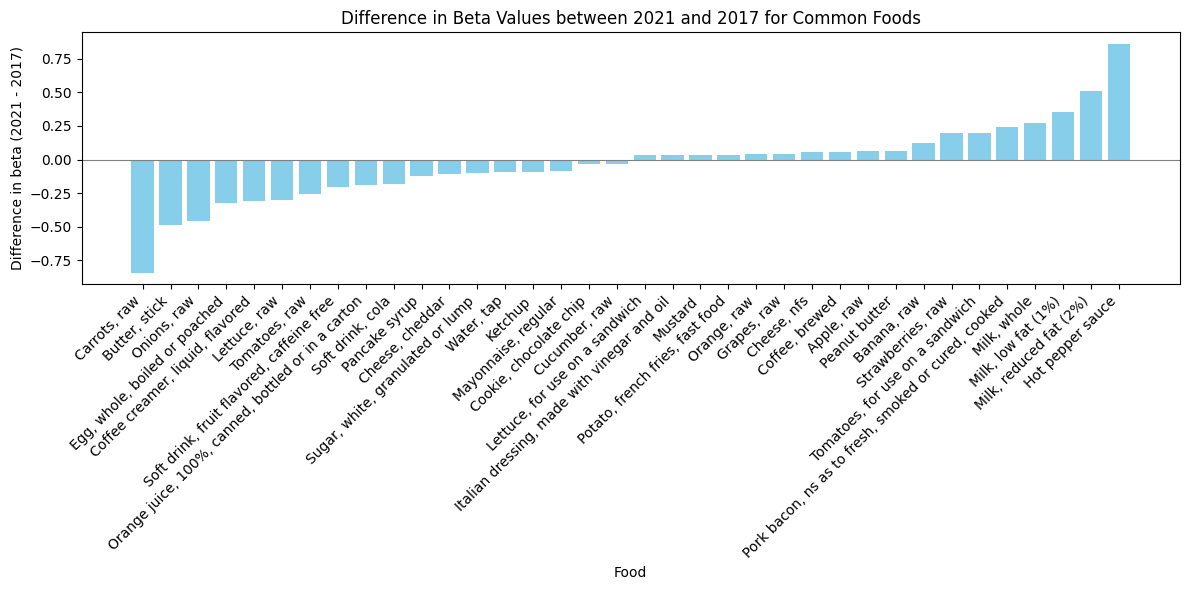

In [22]:

df_2017_common = b_2017[b_2017['j'].isin(common_elements)]
df_2021_common = b_2021[b_2021['j'].isin(common_elements)]

# 3. Merge the two datasets on the 'j' column.
merged = pd.merge(df_2017_common, df_2021_common, on='j', suffixes=('_2017', '_2021'))

# 4. Compute the difference in beta values (2021 - 2017).
merged['beta_diff'] = merged['beta_2021'] - merged['beta_2017']

# 5. Sort by difference for clearer visualization (optional).
merged.sort_values('beta_diff', inplace=True)

# 6. Create a bar chart of the differences.
plt.figure(figsize=(12, 6))
x = np.arange(len(merged))
plt.bar(x, merged['beta_diff'], color='skyblue')

# Add labels and title
plt.xlabel('Food')
plt.ylabel('Difference in beta (2021 - 2017)')
plt.title('Difference in Beta Values between 2021 and 2017 for Common Foods')
plt.xticks(x, merged['j'], rotation=45, ha='right')
plt.axhline(0, color='gray', linewidth=0.8)  # add a horizontal line at 0 for reference

plt.tight_layout()
plt.show()


In [23]:
common_elements2 = set(g_2017["j"]).intersection(set(g_2021["j"]))

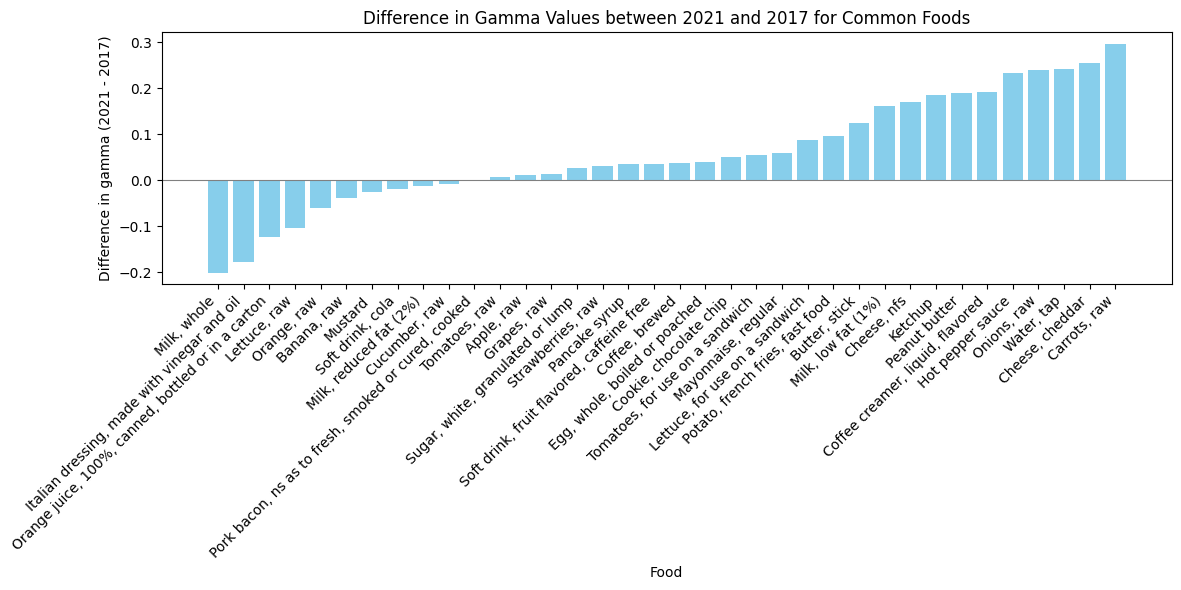

In [24]:
df_2017_common = g_2017[g_2017['j'].isin(common_elements2)]
df_2021_common = g_2021[g_2021['j'].isin(common_elements2)]

# 3. Merge the two datasets on the 'j' column.
merged = pd.merge(df_2017_common, df_2021_common, on='j', suffixes=('_2017', '_2021'))

# 4. Compute the difference in beta values (2021 - 2017).
merged['gamma_diff'] = merged['Constant_2021'] - merged['Constant_2017']

# 5. Sort by difference for clearer visualization (optional).
merged.sort_values('gamma_diff', inplace=True)

# 6. Create a bar chart of the differences.
plt.figure(figsize=(12, 6))
x = np.arange(len(merged))
plt.bar(x, merged['gamma_diff'], color='skyblue')

# Add labels and title
plt.xlabel('Food')
plt.ylabel('Difference in gamma (2021 - 2017)')
plt.title('Difference in Gamma Values between 2021 and 2017 for Common Foods')
plt.xticks(x, merged['j'], rotation=45, ha='right')
plt.axhline(0, color='gray', linewidth=0.8)  # add a horizontal line at 0 for reference

plt.tight_layout()
plt.show()